# EDA

### Imports

In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Numpy Version ', np.__version__)
print('Panda Version ', pd.__version__)

Numpy Version  1.26.4
Panda Version  2.2.2


### Load in CSV and Excel files and Create panda Data Frames

In [266]:
ca = pd.read_csv('customer_address_and_zip_mapping.csv')
cp = pd.read_csv('customer_profile.csv')
td = pd.read_csv('transactional_data.csv')
dc = pd.read_excel('delivery_cost_data.xlsx')

### View the Data

### Customer Address and zip_mapping

There are 2 columns: Zip code, and full address <br>
Both columns have 1801 rows with no missing values and all values are unique

In [270]:
print('# of rows: ', ca.shape[0], '# of columns: ', ca.shape[1], '\n')
print(ca.columns, '\n')
print(ca.dtypes, '\n')
print(ca.count(), '\n')
print(ca.nunique(), '\n')
print('Total count of cell values', ca.size, '\n')
print('Both columns have no missing values', '\n', ca.isna().any(axis=0), '\n')
print(ca.describe())
display(ca)


# of rows:  1801 # of columns:  2 

Index(['zip', 'full address'], dtype='object') 

zip              int64
full address    object
dtype: object 

zip             1801
full address    1801
dtype: int64 

zip             1801
full address    1801
dtype: int64 

Total count of cell values 3602 

Both columns have no missing values 
 zip             False
full address    False
dtype: bool 

                zip
count   1801.000000
mean   28919.810105
std    25588.639728
min     1001.000000
25%     2153.000000
50%    21634.000000
75%    42440.000000
max    71483.000000


,zip,full address
0,71018,"71018,Cotton Valley,Louisiana,LA,Webster,119,3..."
1,71021,"71021,Cullen,Louisiana,LA,Webster,119,32.9721,..."
2,71023,"71023,Doyline,Louisiana,LA,Webster,119,32.49,-..."
3,71024,"71024,Dubberly,Louisiana,LA,Webster,119,32.519..."
4,71039,"71039,Heflin,Louisiana,LA,Webster,119,32.447,-..."
...,...,...
1796,40118,"40118,Fairdale,Kentucky,KY,Jefferson,111,38.10..."
1797,40201,"40201,Louisville,Kentucky,KY,Jefferson,111,38...."
1798,40202,"40202,Louisville,Kentucky,KY,Jefferson,111,38...."
1799,40203,"40203,Louisville,Kentucky,KY,Jefferson,111,38...."


### Customer Profile

there are 11 columns<br>
the only column that contians null values is PRIMARY_GROUP_NUMBER <br>

Appears to be the same number of unquie zip codes as in the Customer Address and zip_mapping csv file. These could potentially be merged together (assuming these are the same 1801 zip codes)

In [273]:
print('# of rows: ', cp.shape[0], '# of columns: ', cp.shape[1], '\n')
print(cp.columns, '\n')
print(cp.dtypes, '\n')
print(cp.count(), '\n')
print(cp.nunique(), '\n')
print('Total count of cell values', cp.size, '\n')
print('PRIMARY_GROUP_NUMBER is the only column with missing numbers', '\n', cp.isna().any(axis=0), '\n')
print(cp.describe())
display(cp)

# of rows:  30478 # of columns:  11 

Index(['CUSTOMER_NUMBER', 'PRIMARY_GROUP_NUMBER', 'FREQUENT_ORDER_TYPE',
       'FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE', 'COLD_DRINK_CHANNEL',
       'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER',
       'CO2_CUSTOMER', 'ZIP_CODE'],
      dtype='object') 

CUSTOMER_NUMBER           int64
PRIMARY_GROUP_NUMBER    float64
FREQUENT_ORDER_TYPE      object
FIRST_DELIVERY_DATE      object
ON_BOARDING_DATE         object
COLD_DRINK_CHANNEL       object
TRADE_CHANNEL            object
SUB_TRADE_CHANNEL        object
LOCAL_MARKET_PARTNER       bool
CO2_CUSTOMER               bool
ZIP_CODE                  int64
dtype: object 

CUSTOMER_NUMBER         30478
PRIMARY_GROUP_NUMBER    12282
FREQUENT_ORDER_TYPE     30478
FIRST_DELIVERY_DATE     30478
ON_BOARDING_DATE        30478
COLD_DRINK_CHANNEL      30478
TRADE_CHANNEL           30478
SUB_TRADE_CHANNEL       30478
LOCAL_MARKET_PARTNER    30478
CO2_CUSTOMER            30478
ZIP_CODE            

,CUSTOMER_NUMBER,PRIMARY_GROUP_NUMBER,FREQUENT_ORDER_TYPE,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE
0,501556470,376.0,MYCOKE LEGACY,1/2/2024,8/28/2023,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,False,21664
1,501363456,NaN,SALES REP,4/14/2022,3/22/2022,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,1885
2,600075150,2158.0,SALES REP,3/4/2016,3/22/2012,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,67073
3,500823056,2183.0,OTHER,2/6/2019,11/23/2018,DINING,FAST CASUAL DINING,ASIAN FAST FOOD,False,False,1885
4,600082383,1892.0,SALES REP,3/4/2016,8/31/2010,PUBLIC SECTOR,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,True,False,1203
...,...,...,...,...,...,...,...,...,...,...,...
30473,600565107,NaN,SALES REP,3/8/2017,9/20/2012,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,67651
30474,500954075,NaN,SALES REP,6/25/2019,6/11/2019,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,41129
30475,500799499,NaN,SALES REP,11/13/2018,10/11/2018,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,2350
30476,501484288,NaN,SALES REP,2/9/2023,1/31/2023,DINING,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21780


### transactional_data

In [276]:
print('# of rows: ', td.shape[0], '# of columns: ', td.shape[1], '\n')
print(td.columns, '\n')
print(td.dtypes, '\n')
print(td.count(), '\n')
print(td.nunique(), '\n')
print('Total count of cell values', td.size, '\n')
print('ORDER_TYPE is the only column with missing numbers', '\n', td.isna().any(axis=0), '\n')
print(td.describe())
display(td)

# of rows:  1045540 # of columns:  11 

Index(['TRANSACTION_DATE', 'WEEK', 'YEAR', 'CUSTOMER_NUMBER', 'ORDER_TYPE',
       'ORDERED_CASES', 'LOADED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS',
       'LOADED_GALLONS', 'DELIVERED_GALLONS'],
      dtype='object') 

TRANSACTION_DATE      object
WEEK                   int64
YEAR                   int64
CUSTOMER_NUMBER        int64
ORDER_TYPE            object
ORDERED_CASES        float64
LOADED_CASES         float64
DELIVERED_CASES      float64
ORDERED_GALLONS      float64
LOADED_GALLONS       float64
DELIVERED_GALLONS    float64
dtype: object 

TRANSACTION_DATE     1045540
WEEK                 1045540
YEAR                 1045540
CUSTOMER_NUMBER      1045540
ORDER_TYPE           1034409
ORDERED_CASES        1045540
LOADED_CASES         1045540
DELIVERED_CASES      1045540
ORDERED_GALLONS      1045540
LOADED_GALLONS       1045540
DELIVERED_GALLONS    1045540
dtype: int64 

TRANSACTION_DATE       723
WEEK                    52
YEAR        

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,DELIVERED_GALLONS
0,1/5/2023,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,90.0
1,1/6/2023,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,0.0
2,1/9/2023,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,0.0
3,1/11/2023,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,2.5
4,1/17/2023,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1045535,12/13/2024,50,2024,501075592,MYCOKE360,12.0,12.0,12.0,0.0,0.0,0.0
1045536,12/13/2024,50,2024,600249707,CALL CENTER,0.0,0.0,0.0,40.0,40.0,40.0
1045537,12/17/2024,51,2024,500463314,CALL CENTER,11.0,10.0,10.0,0.0,0.0,0.0
1045538,12/19/2024,51,2024,600079044,EDI,33.0,33.0,33.0,0.0,0.0,0.0


### delivery_cost_data

In [279]:
print('# of rows: ', dc.shape[0], '# of columns: ', dc.shape[1], '\n')
print(dc.columns, '\n')
print(dc.dtypes, '\n')
print(dc.count(), '\n')
print(dc.nunique(), '\n')
print('Total count of cell values', dc.size, '\n')
print('Columns have no missing values', '\n', dc.isna().any(axis=0), '\n')
print(dc.describe())
display(dc)

# of rows:  160 # of columns:  5 

Index(['Cold Drink Channel', 'Vol Range', 'Applicable To',
       'Median Delivery Cost', 'Cost Type'],
      dtype='object') 

Cold Drink Channel       object
Vol Range                object
Applicable To            object
Median Delivery Cost    float64
Cost Type                object
dtype: object 

Cold Drink Channel      160
Vol Range               160
Applicable To           160
Median Delivery Cost    160
Cost Type               160
dtype: int64 

Cold Drink Channel        8
Vol Range                10
Applicable To             2
Median Delivery Cost    160
Cost Type                 2
dtype: int64 

Total count of cell values 800 

Columns have no missing values 
 Cold Drink Channel      False
Vol Range               False
Applicable To           False
Median Delivery Cost    False
Cost Type               False
dtype: bool 

       Median Delivery Cost
count            160.000000
mean               2.597196
std                1.714502
min      

,Cold Drink Channel,Vol Range,Applicable To,Median Delivery Cost,Cost Type
0,WORKPLACE,0 - 149,Bottles and Cans,8.064950,Per Case
1,WORKPLACE,150 - 299,Bottles and Cans,4.165646,Per Case
2,WORKPLACE,300 - 449,Bottles and Cans,2.991558,Per Case
3,WORKPLACE,450 - 599,Bottles and Cans,2.524222,Per Case
4,WORKPLACE,600 - 749,Bottles and Cans,2.056886,Per Case
...,...,...,...,...,...
155,BULK TRADE,750 - 899,Fountain,1.310382,Per Gallon
156,BULK TRADE,900 - 1049,Fountain,1.067788,Per Gallon
157,BULK TRADE,1050 - 1199,Fountain,0.825195,Per Gallon
158,BULK TRADE,1200 - 1349,Fountain,0.609853,Per Gallon


### Merge data sets

Joining the Customer profile and the Customer Address and zip_mapping

In [282]:
cpca = pd.merge(cp, ca, left_on = "ZIP_CODE", right_on = "zip", how = "left")
display(cpca)

,CUSTOMER_NUMBER,PRIMARY_GROUP_NUMBER,FREQUENT_ORDER_TYPE,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,501556470,376.0,MYCOKE LEGACY,1/2/2024,8/28/2023,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,False,21664,21664,"21664,Secretary,Maryland,MD,Dorchester,19,38.6..."
1,501363456,NaN,SALES REP,4/14/2022,3/22/2022,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,1885,1885,"01885,West Boxford,Massachusetts,MA,Essex,9,42..."
2,600075150,2158.0,SALES REP,3/4/2016,3/22/2012,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,67073,67073,"67073,Lehigh,Kansas,KS,Marion,115,38.3771,-97...."
3,500823056,2183.0,OTHER,2/6/2019,11/23/2018,DINING,FAST CASUAL DINING,ASIAN FAST FOOD,False,False,1885,1885,"01885,West Boxford,Massachusetts,MA,Essex,9,42..."
4,600082383,1892.0,SALES REP,3/4/2016,8/31/2010,PUBLIC SECTOR,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,True,False,1203,1203,"01203,Pittsfield,Massachusetts,MA,Berkshire,3,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,600565107,NaN,SALES REP,3/8/2017,9/20/2012,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,67651,67651,"67651,Natoma,Kansas,KS,Osborne,141,39.2013,-98..."
30474,500954075,NaN,SALES REP,6/25/2019,6/11/2019,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,41129,41129,"41129,Catlettsburg,Kentucky,KY,Boyd,19,38.3799..."
30475,500799499,NaN,SALES REP,11/13/2018,10/11/2018,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,2350,2350,"02350,Monponsett,Massachusetts,MA,Plymouth,23,..."
30476,501484288,NaN,SALES REP,2/9/2023,1/31/2023,DINING,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21780,21780,"21780,Sabillasville,Maryland,MD,Frederick,21,3..."


Joining the cpca mereged data set with the Transactional data set <br>
There are only 2 columns with null values. Order_type and Primary_Group_number

In [284]:
tdcpca = pd.merge(td, cpca, on = 'CUSTOMER_NUMBER' , how = 'left')
display(tdcpca)
print('Columns have no missing values', '\n', tdcpca.isna().any(axis=0), '\n')

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,1/5/2023,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,5/7/2021,4/2/2021,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845..."
1,1/6/2023,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,...,3/23/2018,12/8/2015,WELLNESS,HEALTHCARE,OTHER HEALTHCARE,True,False,41603,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82...."
2,1/9/2023,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,4/12/2021,1/26/2021,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17..."
3,1/11/2023,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,...,5/5/2017,2/28/1997,BULK TRADE,GENERAL,COMPREHENSIVE PROVIDER,False,False,1337,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11..."
4,1/17/2023,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,...,10/29/2019,10/25/2019,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,67473,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045535,12/13/2024,50,2024,501075592,MYCOKE360,12.0,12.0,12.0,0.0,0.0,...,3/20/2020,3/18/2020,GOODS,GOURMET FOOD RETAILER,OTHER GOURMET FOOD,True,False,67621,67621,"67621,Agra,Kansas,KS,Phillips,147,39.8037,-99...."
1045536,12/13/2024,50,2024,600249707,CALL CENTER,0.0,0.0,0.0,40.0,40.0,...,8/5/2016,10/30/2006,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,67560,67560,"67560,Ness City,Kansas,KS,Ness,135,38.4388,-99..."
1045537,12/17/2024,51,2024,500463314,CALL CENTER,11.0,10.0,10.0,0.0,0.0,...,10/23/2017,10/11/2017,DINING,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,67344,67344,"67344,Elk City,Kansas,KS,Montgomery,125,37.314..."
1045538,12/19/2024,51,2024,600079044,EDI,33.0,33.0,33.0,0.0,0.0,...,9/7/2017,7/28/2004,GOODS,GENERAL RETAILER,HOME & HARDWARE,True,False,66407,66407,"66407,Belvue,Kansas,KS,Pottawatomie,149,39.227..."


Columns have no missing values 
 TRANSACTION_DATE        False
WEEK                    False
YEAR                    False
CUSTOMER_NUMBER         False
ORDER_TYPE               True
ORDERED_CASES           False
LOADED_CASES            False
DELIVERED_CASES         False
ORDERED_GALLONS         False
LOADED_GALLONS          False
DELIVERED_GALLONS       False
PRIMARY_GROUP_NUMBER     True
FREQUENT_ORDER_TYPE     False
FIRST_DELIVERY_DATE     False
ON_BOARDING_DATE        False
COLD_DRINK_CHANNEL      False
TRADE_CHANNEL           False
SUB_TRADE_CHANNEL       False
LOCAL_MARKET_PARTNER    False
CO2_CUSTOMER            False
ZIP_CODE                False
zip                     False
full address            False
dtype: bool 



In [285]:
# Find rows where ORDER_TYPE column in the row is null
# There are 11,131 empty rows 
df_OT_null = tdcpca[tdcpca['ORDER_TYPE'].isna()]
display(df_OT_null)

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
98,10/14/2023,42,2023,600251114,NaN,0.0,0.0,0.0,0.0,15.000000,...,10/6/2016,9/26/2008,EVENT,RECREATION,OTHER RECREATION,True,True,20676,20676,"20676,Port Republic,Maryland,MD,Calvert,9,38.4..."
172,4/22/2024,17,2024,600582964,NaN,0.0,0.0,-106.0,0.0,0.000000,...,8/21/2017,11/4/1993,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,20736,20736,"20736,Owings,Maryland,MD,Calvert,9,38.6955,-76..."
240,9/26/2024,39,2024,600264627,NaN,0.0,86.0,86.0,0.0,15.000000,...,9/27/2016,8/16/2001,EVENT,RECREATION,OTHER RECREATION,True,True,20676,20676,"20676,Port Republic,Maryland,MD,Calvert,9,38.4..."
348,9/20/2023,38,2023,600564833,NaN,0.0,28.0,28.0,0.0,0.000000,...,7/27/2017,8/19/2012,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,20736,20736,"20736,Owings,Maryland,MD,Calvert,9,38.6955,-76..."
421,6/4/2024,23,2024,600077685,NaN,8.0,8.0,8.0,0.0,0.000000,...,9/6/2017,4/4/2001,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,2492,2492,"02492,Needham,Massachusetts,MA,Norfolk,21,42.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045144,3/22/2024,12,2024,500291598,NaN,30.0,30.0,30.0,0.0,0.000000,...,8/17/2016,6/19/2016,PUBLIC SECTOR,ACADEMIC INSTITUTION,OTHER ACADEMIC INSTITUTION,True,False,21561,21561,"21561,Swanton,Maryland,MD,Garrett,23,39.4764,-..."
1045187,10/5/2024,41,2024,500440865,NaN,0.0,53.0,53.0,0.0,0.000000,...,10/5/2017,9/14/2017,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,67565,67565,"67565,Otis,Kansas,KS,Rush,165,38.5353,-99.0534"
1045384,3/16/2023,11,2023,600060317,NaN,0.0,0.0,0.0,0.0,3.003935,...,2/28/2018,11/26/1996,DINING,FAST CASUAL DINING,BURGER FAST FOOD,True,False,2050,2050,"02050,Marshfield,Massachusetts,MA,Plymouth,23,..."
1045431,10/11/2023,41,2023,501130201,NaN,0.0,0.0,-18.5,0.0,0.000000,...,10/12/2020,9/22/2020,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1420,1420,"01420,Fitchburg,Massachusetts,MA,Worcester,27,..."


In [286]:
# Find rows where ORDER_TYPE column in the row is null
# There are 490,895 empty rows
df_PGN_null = tdcpca[tdcpca['PRIMARY_GROUP_NUMBER'].isna()]
display(df_PGN_null)

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,1/5/2023,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,5/7/2021,4/2/2021,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845..."
2,1/9/2023,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,4/12/2021,1/26/2021,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17..."
6,1/25/2023,4,2023,501363682,MYCOKE LEGACY,6.0,5.0,5.0,0.0,0.0,...,4/29/2022,3/22/2022,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,False,21251,21251,"21251,Baltimore,Maryland,MD,Baltimore,5,39.439..."
7,1/27/2023,4,2023,500245736,CALL CENTER,0.0,0.0,0.0,25.0,25.0,...,3/2/2018,9/30/2015,DINING,OTHER DINING & BEVERAGE,OTHER DINING,True,False,1420,1420,"01420,Fitchburg,Massachusetts,MA,Worcester,27,..."
8,1/27/2023,4,2023,501100933,CALL CENTER,4.0,1.0,1.0,0.0,0.0,...,8/13/2020,6/24/2020,DINING,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,40175,40175,"40175,Vine Grove,Kentucky,KY,Hardin,93,37.8589..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045528,11/8/2024,45,2024,501662901,SALES REP,10.0,10.0,10.0,0.0,0.0,...,9/13/2024,6/5/2024,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,21251,21251,"21251,Baltimore,Maryland,MD,Baltimore,5,39.439..."
1045529,11/22/2024,47,2024,501342765,SALES REP,0.0,0.0,0.0,15.0,15.0,...,4/1/2022,2/4/2022,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,66431,66431,"66431,Harveyville,Kansas,KS,Wabaunsee,197,38.7..."
1045530,11/22/2024,47,2024,600061036,SALES REP,9.5,5.5,0.0,0.0,0.0,...,2/28/2018,4/8/2005,GOODS,GENERAL RETAILER,HOME & HARDWARE,True,False,21655,21655,"21655,Preston,Maryland,MD,Caroline,11,38.7465,..."
1045536,12/13/2024,50,2024,600249707,CALL CENTER,0.0,0.0,0.0,40.0,40.0,...,8/5/2016,10/30/2006,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,67560,67560,"67560,Ness City,Kansas,KS,Ness,135,38.4388,-99..."


#### dropping the columns with null values ( ORDER_TYPE, PRIMARY_GROUP_NUMBER)

In [288]:
tdcpca_no_null_cols = tdcpca.dropna(axis='columns', how='any')
print('Columns have no missing values', '\n', tdcpca_no_null_cols.isna().any(axis=0), '\n')
print(tdcpca_no_null_cols.dtypes, '\n')

Columns have no missing values 
 TRANSACTION_DATE        False
WEEK                    False
YEAR                    False
CUSTOMER_NUMBER         False
ORDERED_CASES           False
LOADED_CASES            False
DELIVERED_CASES         False
ORDERED_GALLONS         False
LOADED_GALLONS          False
DELIVERED_GALLONS       False
FREQUENT_ORDER_TYPE     False
FIRST_DELIVERY_DATE     False
ON_BOARDING_DATE        False
COLD_DRINK_CHANNEL      False
TRADE_CHANNEL           False
SUB_TRADE_CHANNEL       False
LOCAL_MARKET_PARTNER    False
CO2_CUSTOMER            False
ZIP_CODE                False
zip                     False
full address            False
dtype: bool 

TRANSACTION_DATE         object
WEEK                      int64
YEAR                      int64
CUSTOMER_NUMBER           int64
ORDERED_CASES           float64
LOADED_CASES            float64
DELIVERED_CASES         float64
ORDERED_GALLONS         float64
LOADED_GALLONS          float64
DELIVERED_GALLONS       float64
FRE

In [289]:
# Ensure we work on a full copy (if `tdcpa_no_null_cols` was sliced from another DataFrame)
tdcpca_no_null_cols = tdcpca_no_null_cols.copy()

# Add new columns using .loc to avoid the warning
tdcpca_no_null_cols.loc[:, 'TOTAL_ORDERED'] = tdcpca_no_null_cols['ORDERED_CASES'] + tdcpca_no_null_cols['ORDERED_GALLONS']
tdcpca_no_null_cols.loc[:, 'TOTAL_LOADED'] = tdcpca_no_null_cols['LOADED_CASES'] + tdcpca_no_null_cols['LOADED_GALLONS']
tdcpca_no_null_cols.loc[:, 'TOTAL_DELIVERED'] = tdcpca_no_null_cols['DELIVERED_CASES'] + tdcpca_no_null_cols['DELIVERED_GALLONS']

# Display updated DataFrame
print(tdcpca_no_null_cols.head())
display(tdcpca_no_null_cols)

  TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER  ORDERED_CASES  LOADED_CASES  \
0         1/5/2023     1  2023        501202893            1.0           1.0   
1         1/6/2023     1  2023        500264574           12.5          12.5   
2         1/9/2023     2  2023        501174701            2.0           2.0   
3        1/11/2023     2  2023        600586532           18.0          16.0   
4        1/17/2023     3  2023        501014325           29.0          29.0   

   DELIVERED_CASES  ORDERED_GALLONS  LOADED_GALLONS  DELIVERED_GALLONS  ...  \
0              1.0             90.0            90.0               90.0  ...   
1             12.5              0.0             0.0                0.0  ...   
2              2.0              0.0             0.0                0.0  ...   
3             16.0              2.5             2.5                2.5  ...   
4             29.0              0.0             0.0                0.0  ...   

          TRADE_CHANNEL       SUB_TRADE_CHAN

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,DELIVERED_GALLONS,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,TOTAL_ORDERED,TOTAL_LOADED,TOTAL_DELIVERED
0,1/5/2023,1,2023,501202893,1.0,1.0,1.0,90.0,90.0,90.0,...,COMPREHENSIVE DINING,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845...",91.0,91.0,91.0
1,1/6/2023,1,2023,500264574,12.5,12.5,12.5,0.0,0.0,0.0,...,HEALTHCARE,OTHER HEALTHCARE,True,False,41603,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82....",12.5,12.5,12.5
2,1/9/2023,2,2023,501174701,2.0,2.0,2.0,0.0,0.0,0.0,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17...",2.0,2.0,2.0
3,1/11/2023,2,2023,600586532,18.0,16.0,16.0,2.5,2.5,2.5,...,GENERAL,COMPREHENSIVE PROVIDER,False,False,1337,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11...",20.5,18.5,18.5
4,1/17/2023,3,2023,501014325,29.0,29.0,29.0,0.0,0.0,0.0,...,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,67473,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9...",29.0,29.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045535,12/13/2024,50,2024,501075592,12.0,12.0,12.0,0.0,0.0,0.0,...,GOURMET FOOD RETAILER,OTHER GOURMET FOOD,True,False,67621,67621,"67621,Agra,Kansas,KS,Phillips,147,39.8037,-99....",12.0,12.0,12.0
1045536,12/13/2024,50,2024,600249707,0.0,0.0,0.0,40.0,40.0,40.0,...,COMPREHENSIVE DINING,FSR - MISC,True,True,67560,67560,"67560,Ness City,Kansas,KS,Ness,135,38.4388,-99...",40.0,40.0,40.0
1045537,12/17/2024,51,2024,500463314,11.0,10.0,10.0,0.0,0.0,0.0,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,67344,67344,"67344,Elk City,Kansas,KS,Montgomery,125,37.314...",11.0,10.0,10.0
1045538,12/19/2024,51,2024,600079044,33.0,33.0,33.0,0.0,0.0,0.0,...,GENERAL RETAILER,HOME & HARDWARE,True,False,66407,66407,"66407,Belvue,Kansas,KS,Pottawatomie,149,39.227...",33.0,33.0,33.0


In [290]:
# 1) Group by CUSTOMER_NUMBER and YEAR and aggregate the total ordered gallons
df_agg = (
    tdcpca_no_null_cols
    .groupby(['CUSTOMER_NUMBER', 'YEAR'], as_index=False)  # 'as_index=False' returns a DataFrame instead of Series
    .agg({'TOTAL_ORDERED': 'sum'})  # or add more columns if needed
)

print(df_agg.head(),'\n')
print(df_agg['TOTAL_ORDERED'].describe())


   CUSTOMER_NUMBER  YEAR  TOTAL_ORDERED
0        500245678  2023          370.0
1        500245678  2024          383.5
2        500245685  2023          601.5
3        500245685  2024          482.0
4        500245686  2023           17.5 

count     55653.000000
mean        689.950353
std        5111.046976
min           0.000000
25%          67.000000
50%         170.000000
75%         457.500000
max      459175.740400
Name: TOTAL_ORDERED, dtype: float64


### Percent change from 2023 to 2024

In [292]:
df_pivot = df_agg.pivot(index='CUSTOMER_NUMBER', columns='YEAR', values='TOTAL_ORDERED').reset_index()
df_pivot.columns = ['CUSTOMER_NUMBER', 'TOTAL_2023', 'TOTAL_2024']  # Rename columns for clarity

df_pivot['NUMERIC_CHANGE'] = df_pivot['TOTAL_2024'] - df_pivot['TOTAL_2023']
df_pivot['PERCENT_CHANGE'] = (df_pivot['NUMERIC_CHANGE'] / df_pivot['TOTAL_2023']) * 100

df_pivot['PERCENT_CHANGE'] = df_pivot['PERCENT_CHANGE'].replace([np.inf, -np.inf], np.nan)

print(df_pivot.sort_values('PERCENT_CHANGE', ascending=False).head(10),'\n')  # Top growing customers
print(df_pivot.sort_values('PERCENT_CHANGE', ascending=True).head(10))   # Most declining customers

       CUSTOMER_NUMBER  TOTAL_2023  TOTAL_2024  NUMERIC_CHANGE  PERCENT_CHANGE
12583        501480642         3.0     2426.00         2423.00    80766.666667
15636        501591475         2.5      461.50          459.00    18360.000000
15350        501580752         1.0      150.00          149.00    14900.000000
28201        600564649         1.0      127.00          126.00    12600.000000
8041         501202275       216.0    16710.00        16494.00     7636.111111
15639        501591568         5.0      318.00          313.00     6260.000000
14937        501565777        47.5     2748.50         2701.00     5686.315789
1458         500399182        10.0      557.75          547.75     5477.500000
4048         500842310         2.0      110.00          108.00     5400.000000
10455        501369643         4.0      212.50          208.50     5212.500000 

       CUSTOMER_NUMBER  TOTAL_2023  TOTAL_2024  NUMERIC_CHANGE  PERCENT_CHANGE
9244         501265032        12.0         0.0    

In [293]:
# 1) Group by CUSTOMER_NUMBER and YEAR and aggregate the total ordered gallons
df_agg = (
    tdcpca_no_null_cols
    .groupby(['CUSTOMER_NUMBER', 'YEAR', 'ZIP_CODE'], as_index=False)  # 'as_index=False' returns a DataFrame instead of Series
    .agg({'ORDERED_GALLONS': 'sum'})  # or add more columns if needed
)

df_agg.head()

,CUSTOMER_NUMBER,YEAR,ZIP_CODE,ORDERED_GALLONS
0,500245678,2023,66508,160.0
1,500245678,2024,66508,232.5
2,500245685,2023,21913,577.5
3,500245685,2024,21913,445.0
4,500245686,2023,1350,0.0


### Each customer number has exaclty 1 zip code associated to it

In [295]:
zip_counts = (
    df_agg
    .groupby('CUSTOMER_NUMBER')['ZIP_CODE']
    .nunique()  # number of unique ZIP codes
    .reset_index(name='ZIP_CODE_COUNT')
)

# Show only customers that have more than 1 ZIP code
zip_counts[zip_counts['ZIP_CODE_COUNT'] > 1]

,CUSTOMER_NUMBER,ZIP_CODE_COUNT


### Count of customer codes by Zip codes

In [297]:
zip_counts_c = (
    df_agg
    .groupby('ZIP_CODE')['CUSTOMER_NUMBER']
    .nunique()  # number of unique customer numbers
    .reset_index(name='CN_CODE_COUNT')
)

# show the number of customer accounts in each zip code
print(zip_counts_c[zip_counts_c['CN_CODE_COUNT'] >= 0])
print(zip_counts_c['CN_CODE_COUNT'].describe())

      ZIP_CODE  CN_CODE_COUNT
0         1001              2
1         1002             20
2         1003              1
3         1004              6
4         1005             21
...        ...            ...
1794     71422              1
1795     71440              5
1796     71471              8
1797     71473             10
1798     71483              4

[1799 rows x 2 columns]
count    1799.000000
mean       16.854919
std        21.560339
min         1.000000
25%         2.000000
50%         9.000000
75%        23.000000
max       158.000000
Name: CN_CODE_COUNT, dtype: float64


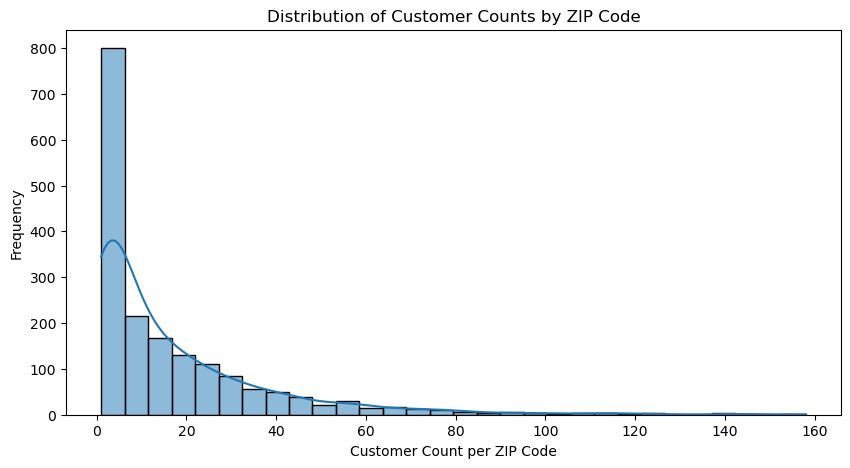

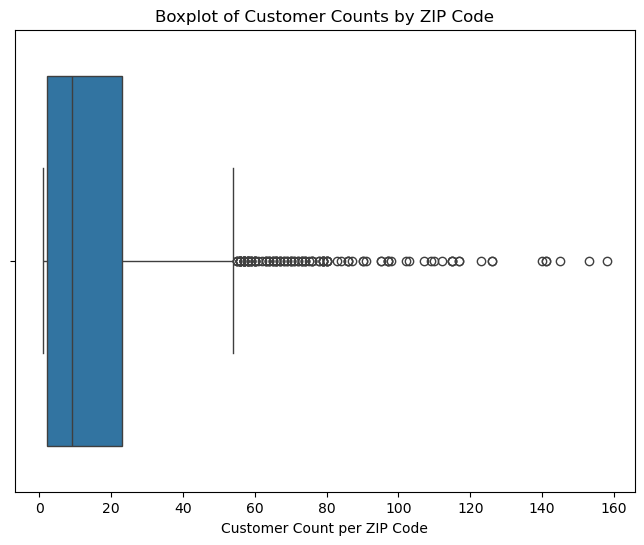

In [298]:
# Create a histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10,5))
sns.histplot(zip_counts_c['CN_CODE_COUNT'], bins=30, kde=True)
plt.xlabel('Customer Count per ZIP Code')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Counts by ZIP Code')
plt.show()

# Create a boxplot of the data
plt.figure(figsize=(8,6))
sns.boxplot(x=zip_counts_c['CN_CODE_COUNT'])
plt.xlabel('Customer Count per ZIP Code')
plt.title('Boxplot of Customer Counts by ZIP Code')
plt.show()

In [342]:
# Extract customer numbers with positive and negative change
growing_customers = df_pivot[df_pivot['PERCENT_CHANGE'] > 0]['CUSTOMER_NUMBER']
declining_customers = df_pivot[df_pivot['PERCENT_CHANGE'] < 0]['CUSTOMER_NUMBER']

print('Number of that grew in volume from 2023 to 2024: ', growing_customers.count())
print('Number of that declined in volume from 2023 to 2024: ', declining_customers.count())
print('Percent that have increase from 2023 to 2024: ', (growing_customers.count()/(growing_customers.count()+declining_customers.count()))*100)

Number of that grew in volume from 2023 to 2024:  10858
Number of that declined in volume from 2023 to 2024:  14053
Percent that have increase from 2023 to 2024:  43.58717032636184


### Frequesnt Order type by customer groth or decline

In [323]:
# Extract customer numbers with positive and negative change
growing_customers = df_pivot[df_pivot['PERCENT_CHANGE'] > 0]['CUSTOMER_NUMBER']
declining_customers = df_pivot[df_pivot['PERCENT_CHANGE'] < 0]['CUSTOMER_NUMBER']

# Filter the main dataset to get ORDER_TYPE for growing customers
order_types_growing = tdcpca_no_null_cols[tdcpca_no_null_cols['CUSTOMER_NUMBER'].isin(growing_customers)][['CUSTOMER_NUMBER', 'FREQUENT_ORDER_TYPE']]

# Filter the main dataset to get ORDER_TYPE for declining customers
order_types_declining = tdcpca_no_null_cols[tdcpca_no_null_cols['CUSTOMER_NUMBER'].isin(declining_customers)][['CUSTOMER_NUMBER', 'FREQUENT_ORDER_TYPE']]

# Display results
print("Order Types for Growing Customers:")
display(order_types_growing.value_counts())

print("Order Types for Declining Customers:")
display(order_types_declining.value_counts())

# Count order types for growing and declining customers
order_type_distribution_growing = order_types_growing['FREQUENT_ORDER_TYPE'].value_counts()
order_type_distribution_declining = order_types_declining['FREQUENT_ORDER_TYPE'].value_counts()

# Display the distributions
print('\n')
print("Distribution of ORDER_TYPE for Growing Customers:")
display(order_type_distribution_growing)
print('\n')
print("Distribution of ORDER_TYPE for Declining Customers:")
display(order_type_distribution_declining)

Order Types for Growing Customers:


CUSTOMER_NUMBER  FREQUENT_ORDER_TYPE
600686568        SALES REP              393
600573998        SALES REP              320
600265975        SALES REP              317
600250325        SALES REP              314
501213694        SALES REP              307
                                       ... 
500282545        OTHER                    2
600076013        SALES REP                2
501353857        SALES REP                2
500991320        CALL CENTER              2
500842310        OTHER                    2
Name: count, Length: 10858, dtype: int64

Order Types for Declining Customers:


CUSTOMER_NUMBER  FREQUENT_ORDER_TYPE
600075807        SALES REP              314
501209093        SALES REP              308
600058849        SALES REP              299
600586558        SALES REP              295
500245976        SALES REP              287
                                       ... 
600060107        SALES REP                2
600059940        OTHER                    2
501328351        SALES REP                2
600059265        OTHER                    2
501252174        SALES REP                2
Name: count, Length: 14053, dtype: int64



Distribution of ORDER_TYPE for Growing Customers:


FREQUENT_ORDER_TYPE
SALES REP        321128
OTHER             70191
MYCOKE360         20350
CALL CENTER       11272
MYCOKE LEGACY      8302
EDI                6160
Name: count, dtype: int64



Distribution of ORDER_TYPE for Declining Customers:


FREQUENT_ORDER_TYPE
SALES REP        399920
OTHER            112482
MYCOKE360         19681
MYCOKE LEGACY     14496
CALL CENTER       13947
EDI                4862
Name: count, dtype: int64

## COLD_DRINK_CHANNEL by customer groth or decline

In [327]:
# Extract customer numbers with positive and negative change
growing_customers = df_pivot[df_pivot['PERCENT_CHANGE'] > 0]['CUSTOMER_NUMBER']
declining_customers = df_pivot[df_pivot['PERCENT_CHANGE'] < 0]['CUSTOMER_NUMBER']

# Filter the main dataset to get ORDER_TYPE for growing customers
order_types_growing = tdcpca_no_null_cols[tdcpca_no_null_cols['CUSTOMER_NUMBER'].isin(growing_customers)][['CUSTOMER_NUMBER', 'COLD_DRINK_CHANNEL']]

# Filter the main dataset to get ORDER_TYPE for declining customers
order_types_declining = tdcpca_no_null_cols[tdcpca_no_null_cols['CUSTOMER_NUMBER'].isin(declining_customers)][['CUSTOMER_NUMBER', 'COLD_DRINK_CHANNEL']]

# Display results
print("Order Types for Growing Customers:")
display(order_types_growing.value_counts())

print("Order Types for Declining Customers:")
display(order_types_declining.value_counts())

# Count order types for growing and declining customers
order_type_distribution_growing = order_types_growing['COLD_DRINK_CHANNEL'].value_counts()
order_type_distribution_declining = order_types_declining['COLD_DRINK_CHANNEL'].value_counts()

# Display the distributions
print('\n')
print("Distribution of ORDER_TYPE for Growing Customers:")
display(order_type_distribution_growing)
print('\n')
print("Distribution of ORDER_TYPE for Declining Customers:")
display(order_type_distribution_declining)

Order Types for Growing Customers:


CUSTOMER_NUMBER  COLD_DRINK_CHANNEL
600686568        BULK TRADE            393
600573998        WORKPLACE             320
600265975        BULK TRADE            317
600250325        DINING                314
501213694        EVENT                 307
                                      ... 
500282545        PUBLIC SECTOR           2
600076013        DINING                  2
501353857        DINING                  2
500991320        PUBLIC SECTOR           2
500842310        EVENT                   2
Name: count, Length: 10858, dtype: int64

Order Types for Declining Customers:


CUSTOMER_NUMBER  COLD_DRINK_CHANNEL
600075807        BULK TRADE            314
501209093        EVENT                 308
600058849        WELLNESS              299
600586558        BULK TRADE            295
500245976        WORKPLACE             287
                                      ... 
600060107        DINING                  2
600059940        EVENT                   2
501328351        GOODS                   2
600059265        WORKPLACE               2
501252174        EVENT                   2
Name: count, Length: 14053, dtype: int64



Distribution of ORDER_TYPE for Growing Customers:


COLD_DRINK_CHANNEL
DINING           202073
GOODS             71013
BULK TRADE        46237
EVENT             44406
PUBLIC SECTOR     23678
ACCOMMODATION     17654
WELLNESS          16733
WORKPLACE         15177
CONVENTIONAL        432
Name: count, dtype: int64



Distribution of ORDER_TYPE for Declining Customers:


COLD_DRINK_CHANNEL
DINING           301425
GOODS             97219
EVENT             47123
BULK TRADE        38706
PUBLIC SECTOR     28215
ACCOMMODATION     24982
WORKPLACE         16453
WELLNESS          10525
CONVENTIONAL        740
Name: count, dtype: int64

In [313]:
print(tdcpca_no_null_cols.columns)


Index(['TRANSACTION_DATE', 'WEEK', 'YEAR', 'CUSTOMER_NUMBER', 'ORDERED_CASES',
       'LOADED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS', 'LOADED_GALLONS',
       'DELIVERED_GALLONS', 'FREQUENT_ORDER_TYPE', 'FIRST_DELIVERY_DATE',
       'ON_BOARDING_DATE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL',
       'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER', 'ZIP_CODE',
       'zip', 'full address', 'TOTAL_ORDERED', 'TOTAL_LOADED',
       'TOTAL_DELIVERED'],
      dtype='object')


## Creating a 1 and 0 varrible for 400 and over ordered quantiy per year

In [234]:
# Step 1: Aggregate TOTAL_ORDERED at the Customer-Year level
df_potential = (
    tdcpca_no_null_cols
    .groupby(['CUSTOMER_NUMBER', 'YEAR'], as_index=False)['TOTAL_ORDERED']
    .sum()
)

# Step 2: Assign potential category (1 = High, 0 = Low)
df_potential['POTENTIAL_CATEGORY'] = (df_potential['TOTAL_ORDERED'] >= 400).astype(int)

# Step 3: Merge back into the main dataset
tdcpca_no_null_cols = tdcpca_no_null_cols.merge(df_potential[['CUSTOMER_NUMBER', 'YEAR', 'POTENTIAL_CATEGORY']], 
                                               on=['CUSTOMER_NUMBER', 'YEAR'], how='left')

# Display the updated dataset
display(tdcpca_no_null_cols)
print(tdcpca_no_null_cols.describe())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,DELIVERED_GALLONS,...,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,TOTAL_ORDERED,TOTAL_LOADED,TOTAL_DELIVERED,POTENTIAL_CATEGORY
0,1/5/2023,1,2023,501202893,1.0,1.0,1.0,90.0,90.0,90.0,...,FSR - MISC,True,True,66955,66955,"66955,Mahaska,Kansas,KS,Washington,201,39.9845...",91.0,91.0,91.0,1
1,1/6/2023,1,2023,500264574,12.5,12.5,12.5,0.0,0.0,0.0,...,OTHER HEALTHCARE,True,False,41603,41603,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82....",12.5,12.5,12.5,0
2,1/9/2023,2,2023,501174701,2.0,2.0,2.0,0.0,0.0,0.0,...,OTHER FAST FOOD,True,True,1824,1824,"01824,Chelmsford,Massachusetts,MA,Middlesex,17...",2.0,2.0,2.0,0
3,1/11/2023,2,2023,600586532,18.0,16.0,16.0,2.5,2.5,2.5,...,COMPREHENSIVE PROVIDER,False,False,1337,1337,"01337,Bernardston,Massachusetts,MA,Franklin,11...",20.5,18.5,18.5,1
4,1/17/2023,3,2023,501014325,29.0,29.0,29.0,0.0,0.0,0.0,...,OTHER GENERAL RETAIL,True,False,67473,67473,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9...",29.0,29.0,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045535,12/13/2024,50,2024,501075592,12.0,12.0,12.0,0.0,0.0,0.0,...,OTHER GOURMET FOOD,True,False,67621,67621,"67621,Agra,Kansas,KS,Phillips,147,39.8037,-99....",12.0,12.0,12.0,0
1045536,12/13/2024,50,2024,600249707,0.0,0.0,0.0,40.0,40.0,40.0,...,FSR - MISC,True,True,67560,67560,"67560,Ness City,Kansas,KS,Ness,135,38.4388,-99...",40.0,40.0,40.0,1
1045537,12/17/2024,51,2024,500463314,11.0,10.0,10.0,0.0,0.0,0.0,...,MEXICAN FAST FOOD,True,False,67344,67344,"67344,Elk City,Kansas,KS,Montgomery,125,37.314...",11.0,10.0,10.0,0
1045538,12/19/2024,51,2024,600079044,33.0,33.0,33.0,0.0,0.0,0.0,...,HOME & HARDWARE,True,False,66407,66407,"66407,Belvue,Kansas,KS,Pottawatomie,149,39.227...",33.0,33.0,33.0,1


               WEEK          YEAR  CUSTOMER_NUMBER  ORDERED_CASES  \
count  1.045540e+06  1.045540e+06     1.045540e+06   1.045540e+06   
mean   2.622860e+01  2.023497e+03     5.466438e+08   2.685165e+01   
std    1.451675e+01  4.999882e-01     4.942659e+07   1.267621e+02   
min    1.000000e+00  2.023000e+03     5.002457e+08   0.000000e+00   
25%    1.400000e+01  2.023000e+03     5.010919e+08   0.000000e+00   
50%    2.600000e+01  2.023000e+03     5.015482e+08   7.000000e+00   
75%    3.800000e+01  2.024000e+03     6.000809e+08   1.850000e+01   
max    5.200000e+01  2.024000e+03     6.009754e+08   8.479888e+03   

       LOADED_CASES  DELIVERED_CASES  ORDERED_GALLONS  LOADED_GALLONS  \
count  1.045540e+06     1.045540e+06     1.045540e+06    1.045540e+06   
mean   2.592258e+01     2.513334e+01     9.873689e+00    9.604892e+00   
std    1.227873e+02     1.215156e+02     2.646945e+01    2.564995e+01   
min    0.000000e+00    -3.132000e+03     0.000000e+00    0.000000e+00   
25%    0.0000

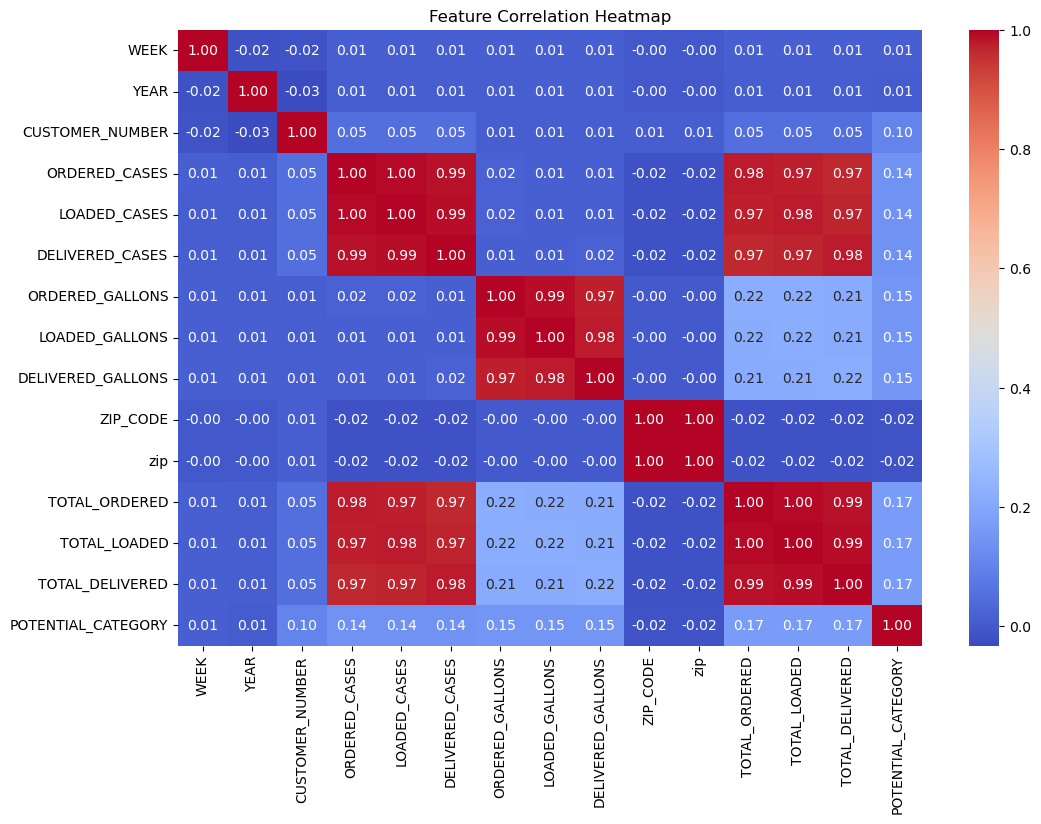

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all non-numeric columns explicitly
numeric_cols = tdcpca_no_null_cols.select_dtypes(include=['number']).copy()

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

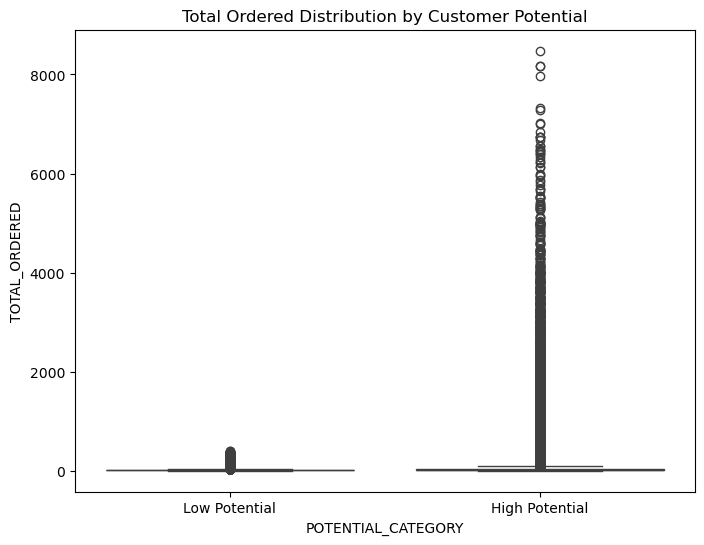

In [238]:
plt.figure(figsize=(8,6))
sns.boxplot(x=tdcpca_no_null_cols['POTENTIAL_CATEGORY'], y=tdcpca_no_null_cols['TOTAL_ORDERED'])
plt.xticks([0, 1], ['Low Potential', 'High Potential'])
plt.title("Total Ordered Distribution by Customer Potential")
plt.show()

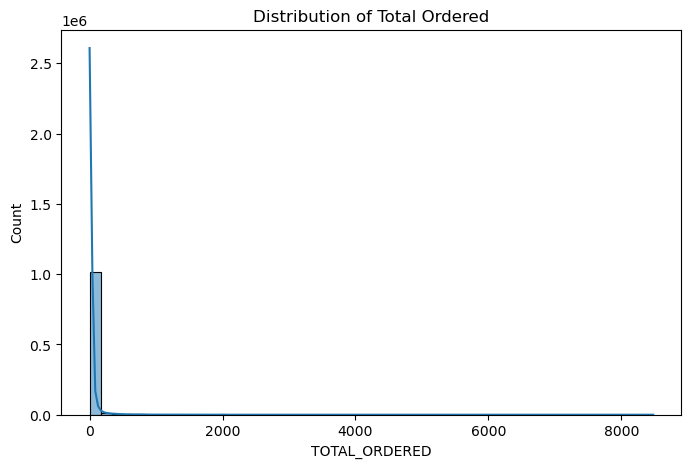

In [240]:
plt.figure(figsize=(8,5))
sns.histplot(tdcpca_no_null_cols['TOTAL_ORDERED'], bins=50, kde=True)
plt.title("Distribution of Total Ordered")
plt.xlabel("TOTAL_ORDERED")
plt.ylabel("Count")
plt.show()

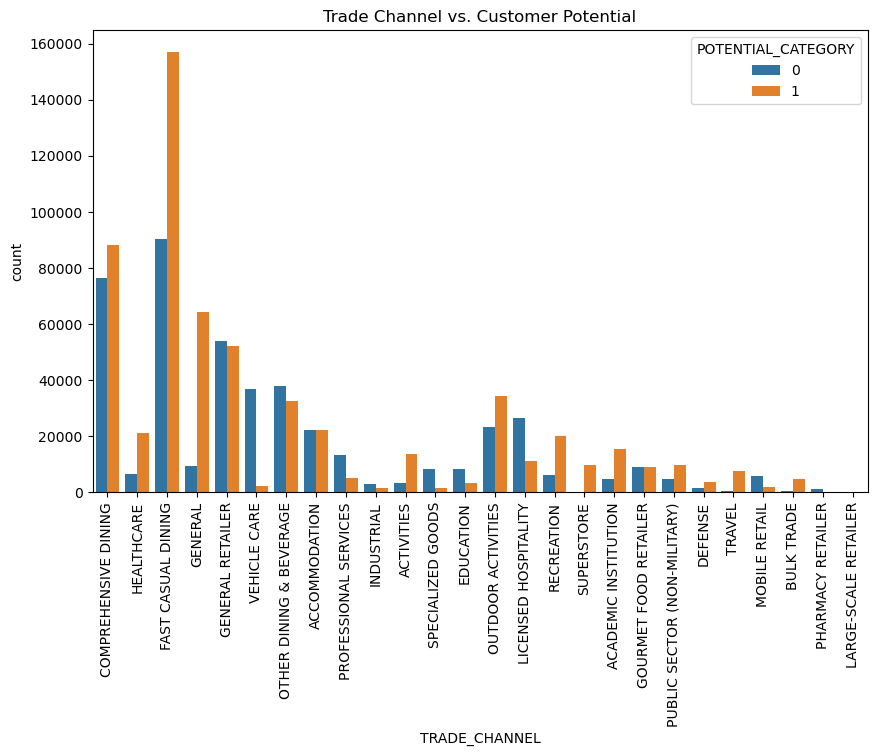

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(data=tdcpca_no_null_cols, x='TRADE_CHANNEL', hue='POTENTIAL_CATEGORY')
plt.xticks(rotation=90)
plt.title("Trade Channel vs. Customer Potential")
plt.show()

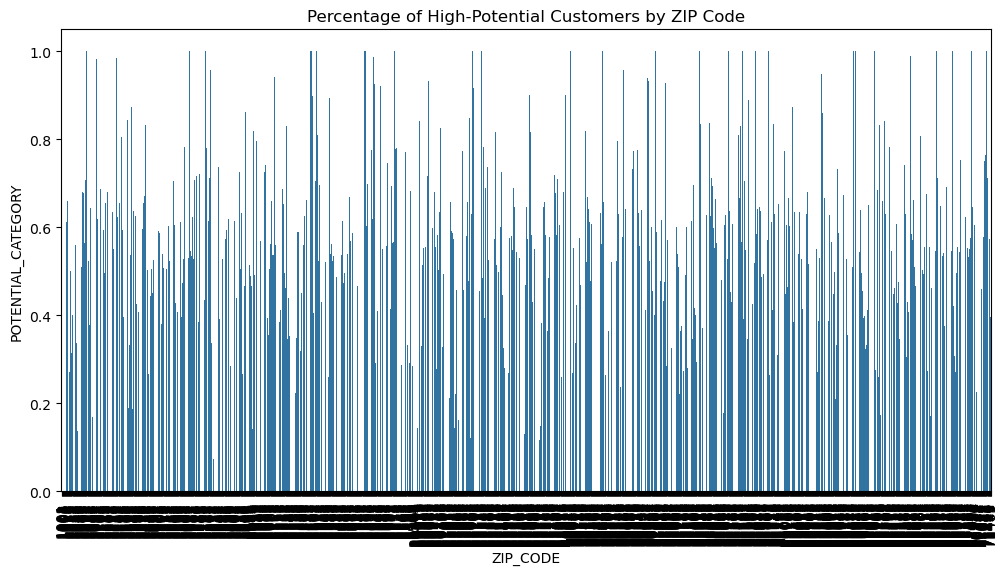

In [244]:
high_potential_by_zip = tdcpca_no_null_cols.groupby('ZIP_CODE')['POTENTIAL_CATEGORY'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=high_potential_by_zip, x='ZIP_CODE', y='POTENTIAL_CATEGORY')
plt.xticks(rotation=90)
plt.title("Percentage of High-Potential Customers by ZIP Code")
plt.show()